# Enviroment Setting Up

In [2]:

# install the tools you will use later
!pip install --upgrade setuptools
!pip install --upgrade pip
!pip install nashpy
!pip install quantecon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simp

# Part1: Normal/Strategic Form Matrix Game

**The Cournot Duopoly game**

The cournot duopoly game(Tadelis 2013) simulates a situation that two firms are producing a homogenous product. Due to society’s given demand for the good, two firms must decide how much to produce. Each firm’s profit will depend on both its own production and its opponents’ production. Each firm can choose to have a high output and a low output. And their payoffs of different strategies are listed as followed:

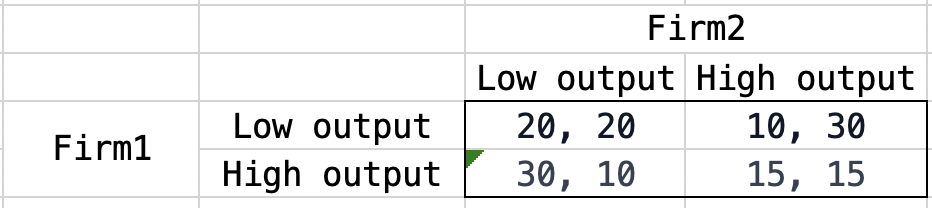

Then we can use Nashpy to calculate the Nash equilibrium of this game.

In [3]:
import nashpy as nash
import numpy as np

# Creater the game with the payoff matrix

A = np.array([[20, 10],
              [30, 15]]) # A is the row player (in this case, prisoner)

B = np.array([[20, 30],
              [10, 15]]) # B is the column player

In [4]:

# Form the game
game2 = nash.Game(A,B)
game2

Bi matrix game with payoff matrices:

Row player:
[[20 10]
 [30 15]]

Column player:
[[20 30]
 [10 15]]

In [5]:
# Find the Nash Equilibrium with Support Enumeration
equilibria = game2.support_enumeration()
for eq in equilibria:
    print(eq)

(array([0., 1.]), array([0., 1.]))


**Elaboration on the Nash equilibrium solution**

In this game, the Nash equilibrium is that firm1 will produce low output and firm2 will produce a low output. This represents the pure strategy Nash equilibrium in the bottom right of the strategic matrix. In other words, each firm will benefit most regardless of another firm's production decisions when choosing to produce a low output.

# Part2: Extensive Form Game: The Centipede Game

**Game Description**

The centipede game is an extensive form game in game theory (Rosenthal 1981). In this game, two players take turns to decide either to stop the game and take a larger share of the pot, or to pass the pot to the other players. The more rounds they turn the pot, the more bonus in the pot, and the more they can get in the end. However, players need to face the risk of the other player stopping the game and taking a larger share of the pots after he gives the pot to the other player. Thus, although keep turning the pots will benefit both, players have incentives to stop the game.

Specifically, the centipede game modeled in the game theory Explorer has a maximum of 6 rounds. Initially, there is $1 in the pot. 


*   Player 1 begins by choosing whether to "pass the pot" or "take the money". If he decides to take the payoff, he will receive 1 dollar, and Player 2 will receive nothing.
*   If Player 1 chooses to pass the pot, Player 2 can decide to "pass the pot" or "take the money”. If Player 2 chooses to take the money, Player 2 will receive 3 dollars, and Player 1 will receive 0 dollars.
*   If Player 2 chooses to pass the pot, Player 1 can decide to "pass the pot" or "take the money”. If he chooses to take the money, Player 1 will receive 4 dollars, and Player 2 will receive 2 dollars. 
*   If Player 1 chooses to pass the pot, Player 2 can decide to "pass the pot" or "take the money”. If Player 2 chooses to take the money, Player 2 will receive 5 dollars, and Player 1 will receive 3 dollars.   

The game will continue in this way until one of the players chooses to end the game or reach the entire six rounds.

**Tree Node of the Game**

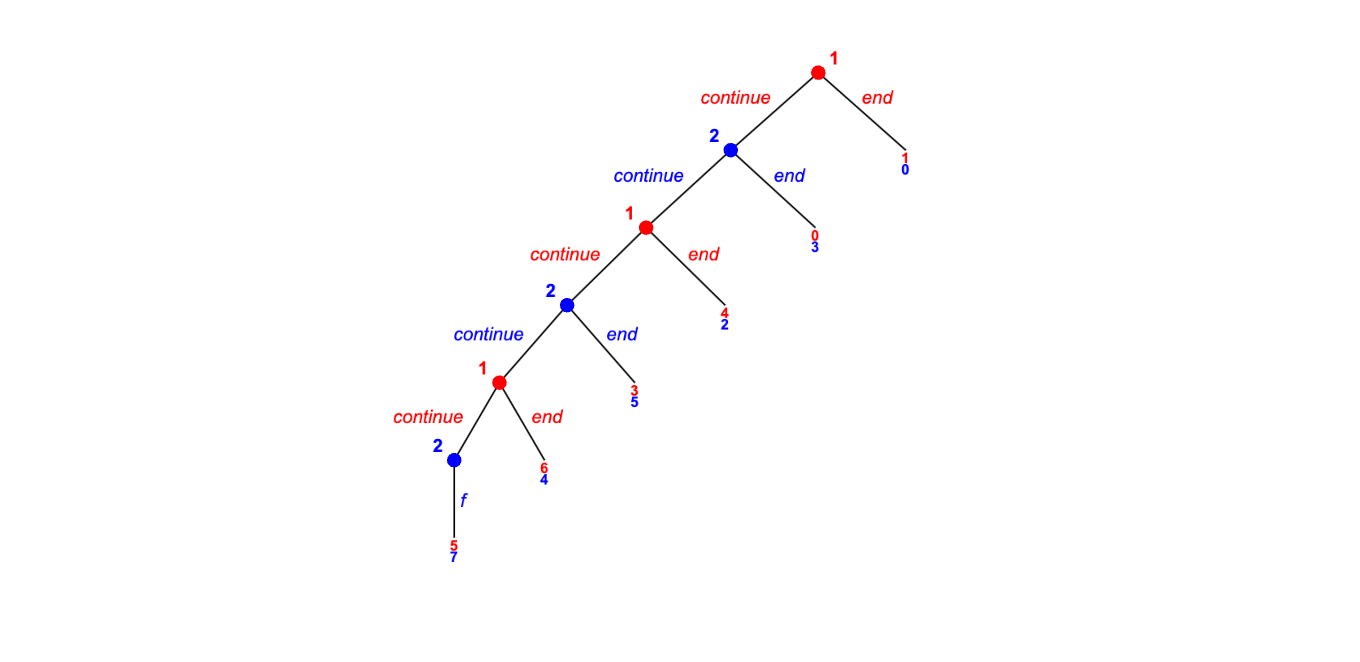

**Extreme Equilibrium of the Strategic Form**

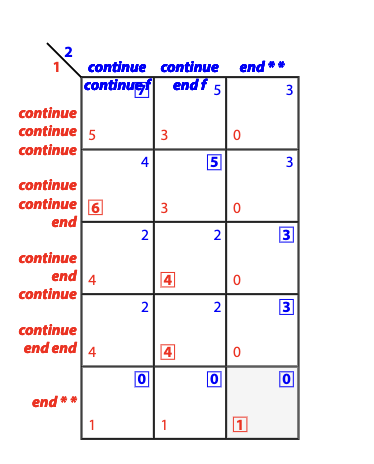

**Elaboration of the Extreme Equilibrium**

Extreme equilibrium is that Player 1 chooses to take the money and stops the game in the first round. In this extreme equilibrium, he has no motivation to change his strategies. This may not be the dominant strategy for the player because passing the pot has the possibility to result in a higher potential payoff. But in the real world, this is a possible outcome. For example, in reality, based on their past interaction experience, if Player 1 strongly believes that Player 2 will take the money in the next round, Player 1 will definitely take the money in the first round. Or, if Player 1’s happiness results from being better off than others, he may not choose to end the game in the first round.



**Perfect Information: SPNE Solution**
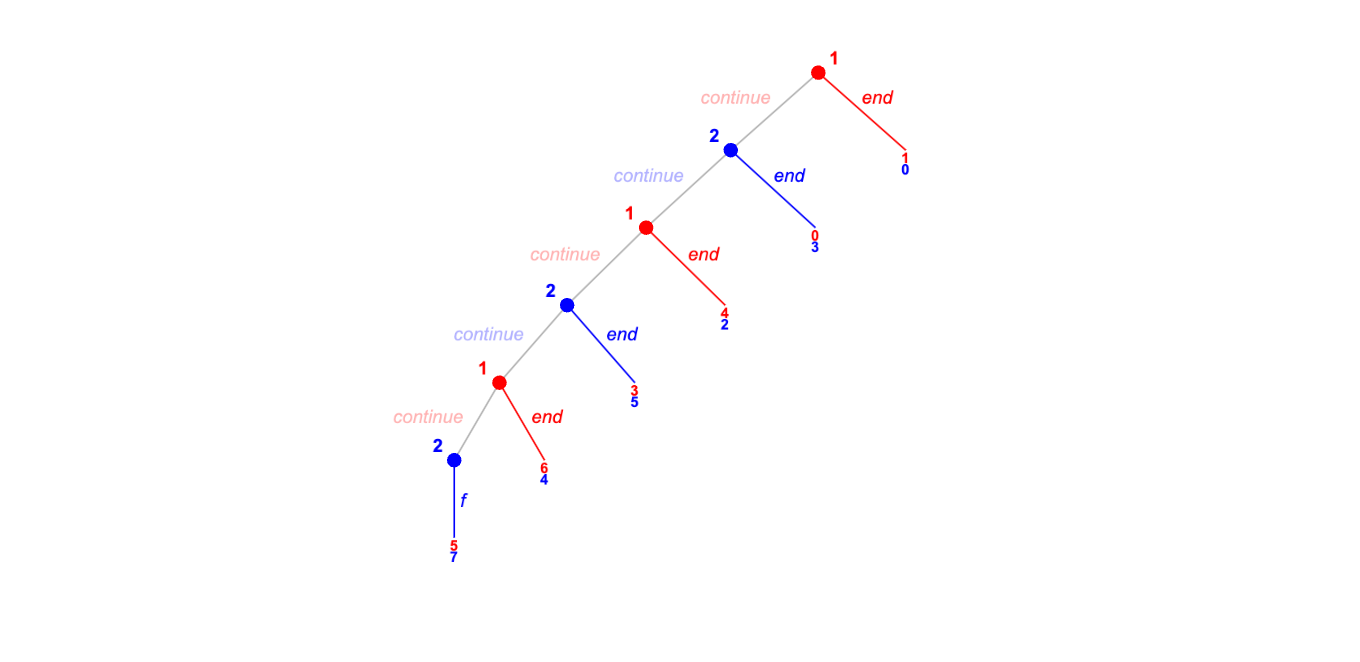

**SPNE Elaboration**

SPNE refers to Subgame Perfect Nash Equilibrium, which assumes that all players choose their optimal strategy in every game stage. Using backward induction:


*   In the final stage, player 2 has only one choice. That is, to take 7 dollars and end the game. And Player 1 can only get 5 dollars.
*   In the second-to-last stage, player 1 can make the decision. If he chooses to pass the pot to Player 2, then Player 2 can have a chance to take more money in the next round while Player 1’s money decreases (to 5 dollars). Therefore, Player 1 will choose to end the game and take 6 dollars at this stage. And Player 2 can only get 4 dollars.
*   In the third-to-last stage, player 2 can make the decision. If he chooses to pass the pot to Player 1, then Player 1 can have a chance to take more money in the next round while Player 2’s money decreases (to 4 dollars). Therefore, Player 2 will choose to end the game and take 5 dollars at this stage. And Player 1 can only get 3 dollars.

And if we keep tracing back this way, every player will choose to end the game when holding the pot. Thus, in SPNE, Player 1 will always take the money and end the game in the first stage.

However, this may work theoretically without considering social, philosophical, and other complicated factors. In reality, people typically have more incentives to cooperate and benefit more. Hence, SPNE is an economic model with substantial limitations and needs to be incorporated with more factors to be applied in practice.

# Citation

**Bibliography**

Rosenthal, R. W. 1981. "Sequential Games of Perfect Information." Econometrica 49 (4): 863-893.

Tadelis, Steven. 2013. Game Theory : An Introduction. Princeton: Princeton University Press.